**Importing important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading the raw dataset**

In [ ]:
df=pd.read_csv('/content/merged_data_IPL (1) (1).csv')

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen


In [ ]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,id,result_margin,target_runs,target_overs
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,2.609200e+05,256796.000000,260611.000000,260611.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,9.070665e+05,17.279451,167.290406,19.846742
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,3.679913e+05,21.600307,32.165944,1.224266
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.483340e+05,6.000000,148.000000,20.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,9.809670e+05,8.000000,167.000000,20.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.254066e+06,20.000000,188.000000,20.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,1.426312e+06,146.000000,288.000000,20.000000


**Checking the null values**

In [ ]:
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


**Handling missing values**

In [ ]:
df['city'] = df['city'].fillna('Unknown')
df['result_margin'] = df['result_margin'].fillna(0)
df['target_runs'] = df['target_runs'].fillna(0)
df['target_overs'] = df['target_overs'].fillna(0)

**Drop columns with excessive missing values**

In [ ]:
columns_to_drop = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder','umpire1','umpire2']
df = df.drop(columns=columns_to_drop)

**Replace old team names with updated names**

In [ ]:
df['winner'] = df['winner'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
})


**View of dataset**

In [ ]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N


**Convert data types**

In [ ]:
df['season'] = pd.to_numeric(df['season'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

**Filling missing values**

In [ ]:
# Define the ranges of rows and the corresponding year to fill in the 'season' column
fill_ranges = {
    '2008': (2, 13490),
    '2010': (27097, 41594),
    '2020': (179060, 193618)
}

# Fill the season column with the appropriate values for the specified ranges
for year, (start, end) in fill_ranges.items():
    df.loc[start:end, 'season'] = int(year)

df['season'] = df['season'].replace(-1, None)  # Replace -1 with NaN for filling
df['season'] = df['season'].fillna(method='ffill')  # Forward fill
df['season'] = df['season'].fillna(method='bfill')  # Backward fill


# Verify by checking the unique values
unique_seasons = df['season'].unique()
print("Unique values in 'season' after filling:", unique_seasons)

df.loc[df['winner'].isna(), 'winner'] = 'No Result'
df.loc[df['player_of_match'].isna(), 'player_of_match'] = 'No Award'

Unique values in 'season' after filling: [2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021. 2022. 2023. 2024.]


In [ ]:
# Step 1: Trim leading/trailing whitespaces and standardize case (e.g., title case)
df['venue'] = df['venue'].str.strip().str.title()

# Step 2: Replace using the mapping dictionary (to ensure mapped names are standardized)
stadium_name_mapping = {
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Feroz Shah Kotla Stadium, Delhi': 'Feroz Shah Kotla Stadium',
    'Punjab Cricket Association Is Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Ma Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Dr Dy Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
}
df['venue'] = df['venue'].replace(stadium_name_mapping)

# Verify changes
unique_venues = df['venue'].unique()
print("Unique values in 'venue':", unique_venues)


Unique values in 'venue': ['M Chinnaswamy Stadium' 'Punjab Cricket Association IS Bindra Stadium'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'Ma Chidambaram Stadium, Chepauk' 'Dr Dy Patil Sports Academy' 'Newlands'
 "St George'S Park" 'Kingsmead' 'Supersport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'Outsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy Aca-Vdca Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'Jsca International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Punjab Cricket Association

**Saving cleaned dataset**

In [ ]:
cleaned_file_path = 'cleaned_merged_data_IPL.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")



Cleaned dataset saved to: cleaned_merged_data_IPL.csv


# **Exploratory Data Analysis**

**Loading cleaned dataset**

In [ ]:
file_path = '/content/cleaned_merged_data_IPL.csv'
data = pd.read_csv(file_path)

**overview of cleaned data**

In [ ]:
print('Dataset_shape:',data.shape)
print('\nColumn Info:')
data.info()
print('\nDescriptive Statistics:')
data.describe()


Dataset_shape: (260920, 30)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   match_id         260920 non-null  int64  
 1   inning           260920 non-null  int64  
 2   batting_team     260920 non-null  object 
 3   bowling_team     260920 non-null  object 
 4   over             260920 non-null  int64  
 5   ball             260920 non-null  int64  
 6   batter           260920 non-null  object 
 7   bowler           260920 non-null  object 
 8   non_striker      260920 non-null  object 
 9   batsman_runs     260920 non-null  int64  
 10  extra_runs       260920 non-null  int64  
 11  total_runs       260920 non-null  int64  
 12  is_wicket        260920 non-null  int64  
 13  id               260920 non-null  int64  
 14  season           260920 non-null  float64
 15  city             260920 non-null  object 
 

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,id,season,result_margin,target_runs,target_overs
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,9.070665e+05,2016.160969,17.006339,167.092289,19.823239
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,3.679913e+05,4.951615,21.537025,32.657719,1.401063
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.359820e+05,2008.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.483340e+05,2012.000000,5.000000,148.000000,20.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,9.809670e+05,2016.000000,8.000000,167.000000,20.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.254066e+06,2021.000000,20.000000,188.000000,20.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,1.426312e+06,2024.000000,146.000000,288.000000,20.000000


**checking missing values**

In [ ]:
print("\n Missing Values:")
print(data.isnull().sum())


 Missing Values:
match_id           0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batter             0
bowler             0
non_striker        0
batsman_runs       0
extra_runs         0
total_runs         0
is_wicket          0
id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
dtype: int64


In [ ]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N


**Top 10 players with max. Man of the Match awards**

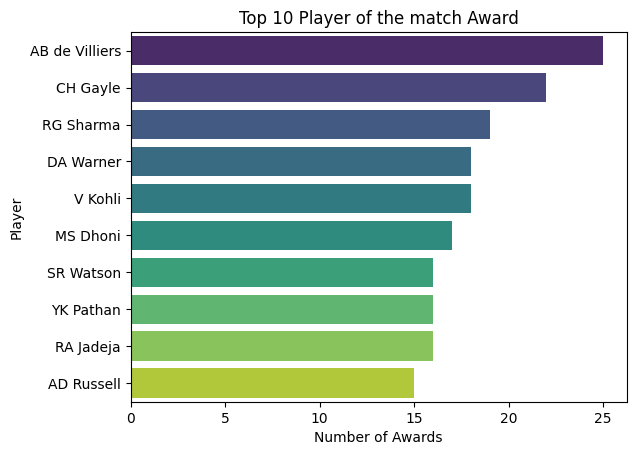

In [ ]:

# Group the data by match ID and select the unique 'player_of_match' for each match
unique_player_awards = data.groupby('match_id')['player_of_match'].unique()

# Flatten the list of unique players across all matches
all_unique_players = [player for sublist in unique_player_awards for player in sublist]

# Count the occurrences of each player across matches (now ensuring uniqueness per match)
unique_player_counts = pd.Series(all_unique_players).value_counts()

# Visualize the top 10 players
import matplotlib.pyplot as plt
import seaborn as sns

top_10_players = unique_player_counts.head(10)
sns.barplot(x=top_10_players.values, y=top_10_players.index, palette="viridis")
plt.title('Top 10 Player of the match Award')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()




**Toss decision analysis**

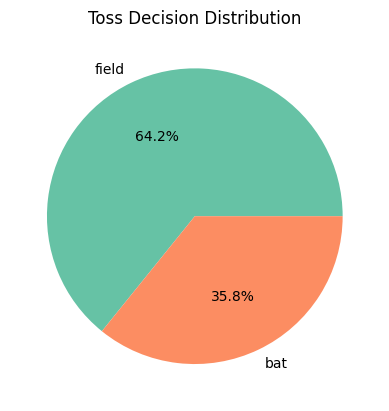

In [ ]:
plt.pie(data['toss_decision'].value_counts(), labels=data['toss_decision'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Toss Decision Distribution')
plt.show()



**Analysis of toss wins leading to match win**

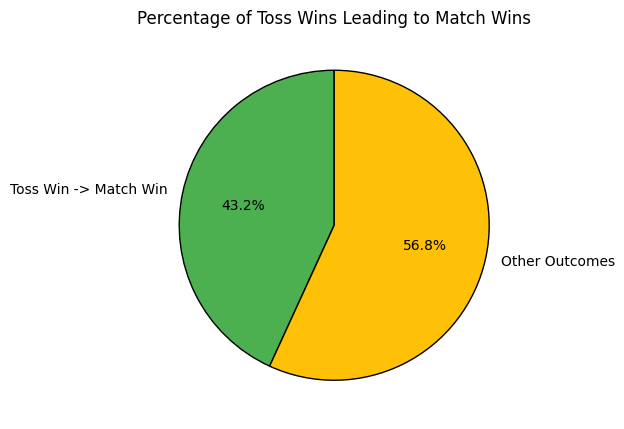

In [ ]:
# Calculate total matches where teams won the toss
total_toss_wins = len(data[data['toss_winner'] == data['winner']])

# Calculate total matches
total_matches = len(data)

# Calculate percentage of toss wins leading to match wins
percentage_toss_win_to_match_win = (total_toss_wins / total_matches) * 100

# Prepare data for the pie chart
labels = ['Toss Win -> Match Win', 'Other Outcomes']
sizes = [percentage_toss_win_to_match_win, 100 - percentage_toss_win_to_match_win]
colors = ['#4CAF50', '#FFC107']

# Plot the pie chart
plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Toss Wins Leading to Match Wins')
plt.show()



**Match Win Percentage by Venue and Toss Decision (Bat/Field)**

<Figure size 1200x1000 with 0 Axes>

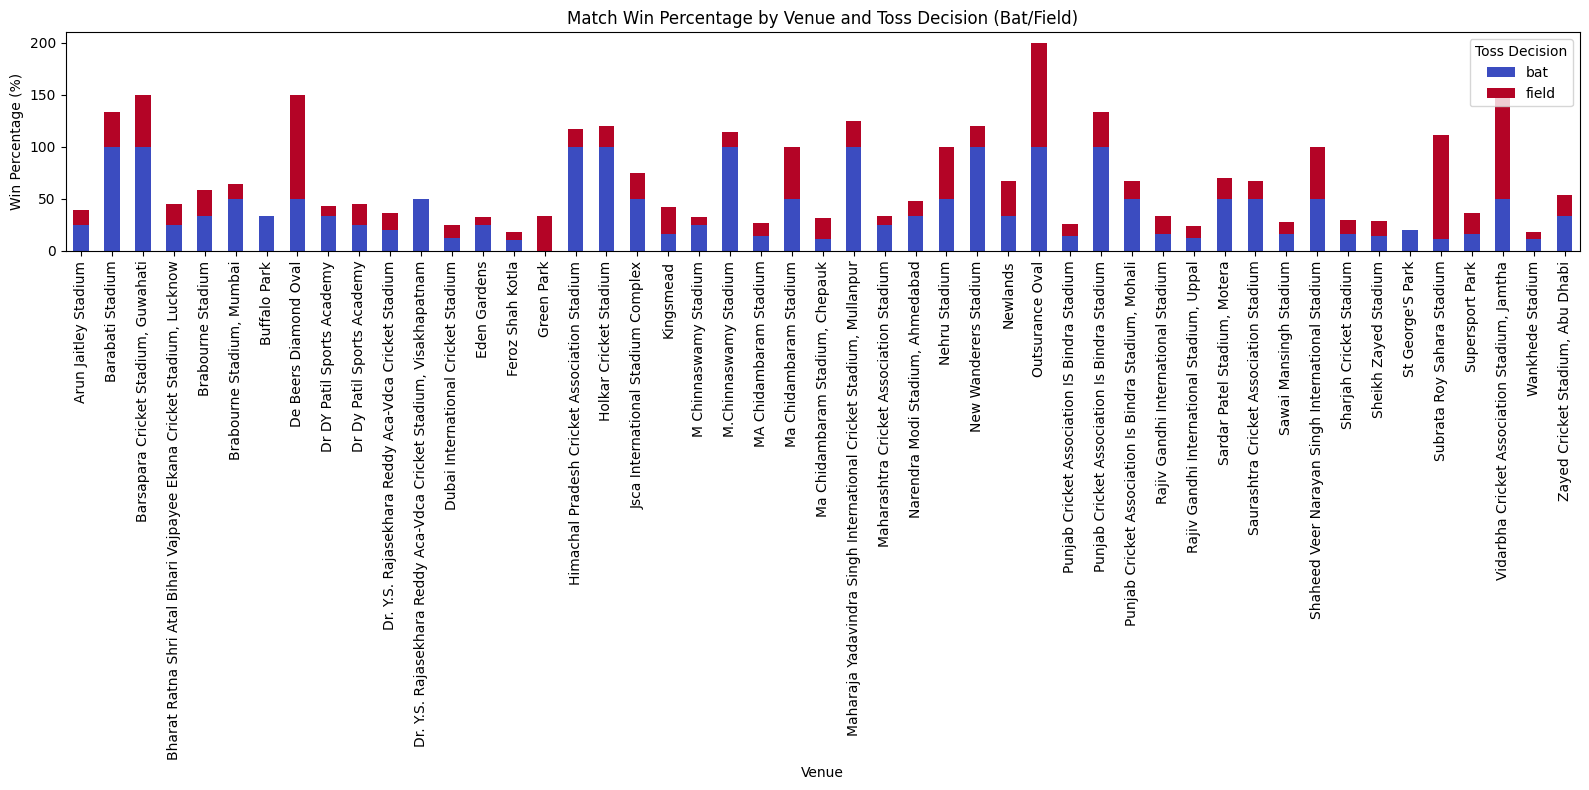

In [ ]:
# Calculate match win percentage based on venue and decision to bat or field
venue_decision_wins = data.groupby(['venue', 'toss_decision', 'winner']).size().reset_index(name='count')

# Normalize counts to percentages within each venue and decision (bat/field)
venue_total_matches = data.groupby(['venue', 'toss_decision']).size().reset_index(name='total_matches')
merged_data = pd.merge(venue_decision_wins, venue_total_matches, on=['venue', 'toss_decision'])
merged_data['win_percentage'] = (merged_data['count'] / merged_data['total_matches']) * 100

# Pivot data for visualization
pivot_table = merged_data.pivot_table(index='venue', columns='toss_decision', values='win_percentage', aggfunc='mean')

# Plot the data
plt.figure(figsize=(12, 10))
pivot_table.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='coolwarm')
plt.title('Match Win Percentage by Venue and Toss Decision (Bat/Field)')
plt.xlabel('Venue')
plt.ylabel('Win Percentage (%)')
plt.legend(title='Toss Decision', loc='upper right')
plt.tight_layout()
plt.show()



**Runs scored per over**

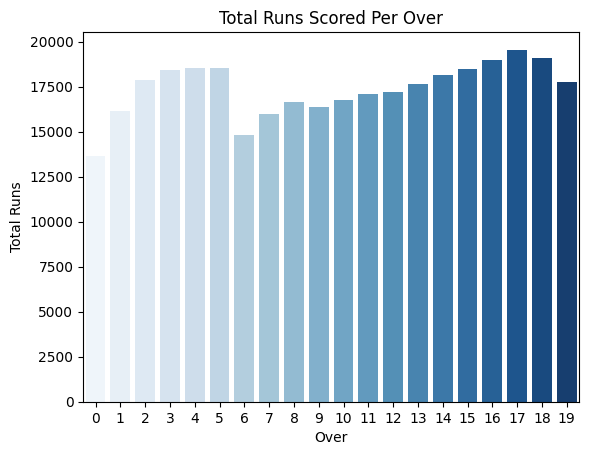

In [ ]:
runs_per_over = data.groupby(['over'])['total_runs'].sum()
sns.barplot(x=runs_per_over.index, y=runs_per_over.values, palette="Blues")
plt.title('Total Runs Scored Per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()


**Top 10 Batting Teams by Total Runs**

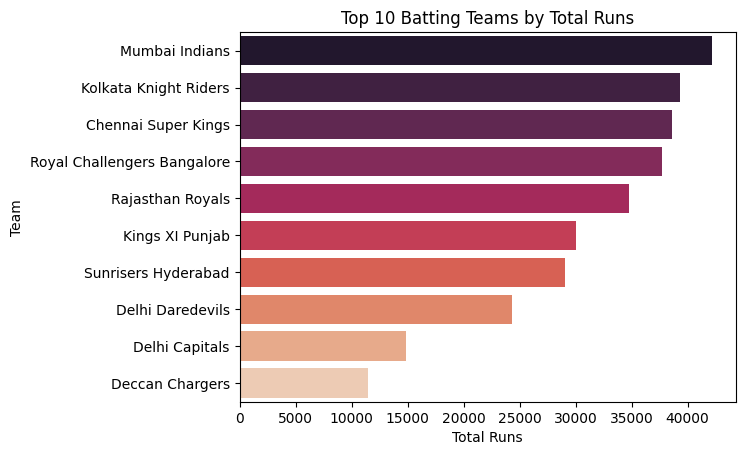

In [ ]:
batting_performance = data.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=batting_performance.values, y=batting_performance.index, palette="rocket")
plt.title('Top 10 Batting Teams by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()

**Top 10 Bowlers by Wickets Taken**

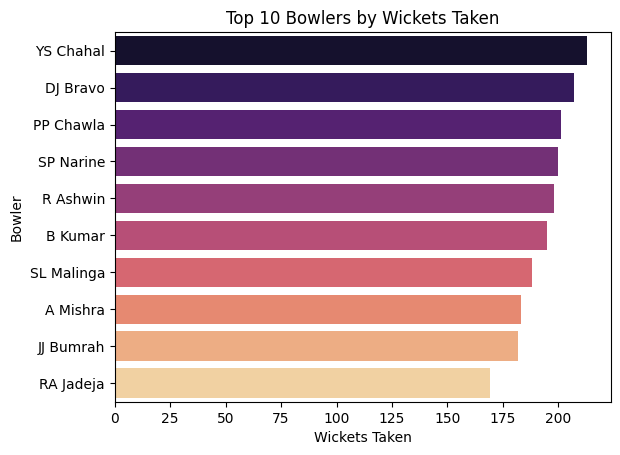

In [ ]:
bowler_performance = data.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=bowler_performance.values, y=bowler_performance.index, palette="magma")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()


**Visualize match outcomes (Win/Loss) across different seasons**

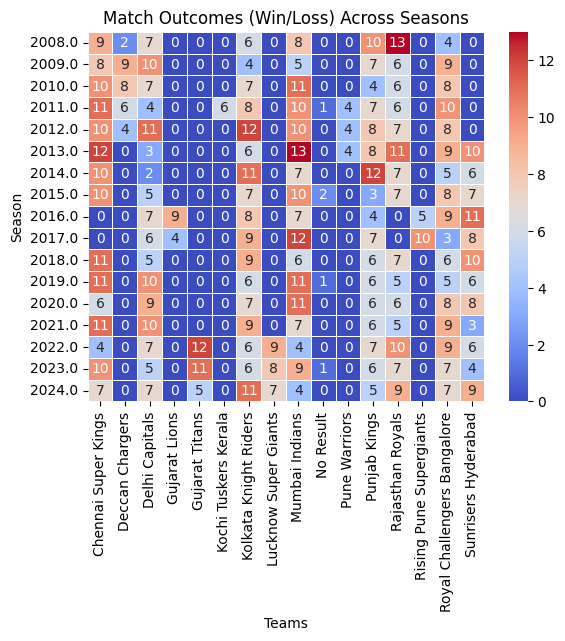

In [ ]:
match_outcomes = data.groupby(['season', 'winner'])['match_id'].nunique().unstack().fillna(0)
sns.heatmap(match_outcomes, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title('Match Outcomes (Win/Loss) Across Seasons')
plt.xlabel('Teams')
plt.ylabel('Season')
plt.show()

**Top 10 players by total runs**

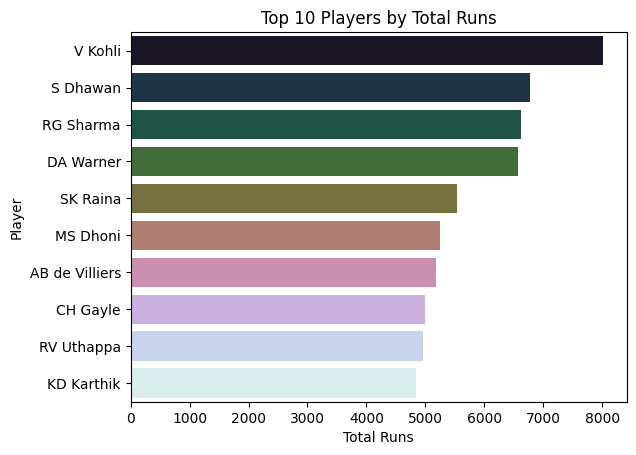

In [ ]:
player_runs = data.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=player_runs.values, y=player_runs.index, palette="cubehelix")
plt.title('Top 10 Players by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()


**Bowlers with best economy**

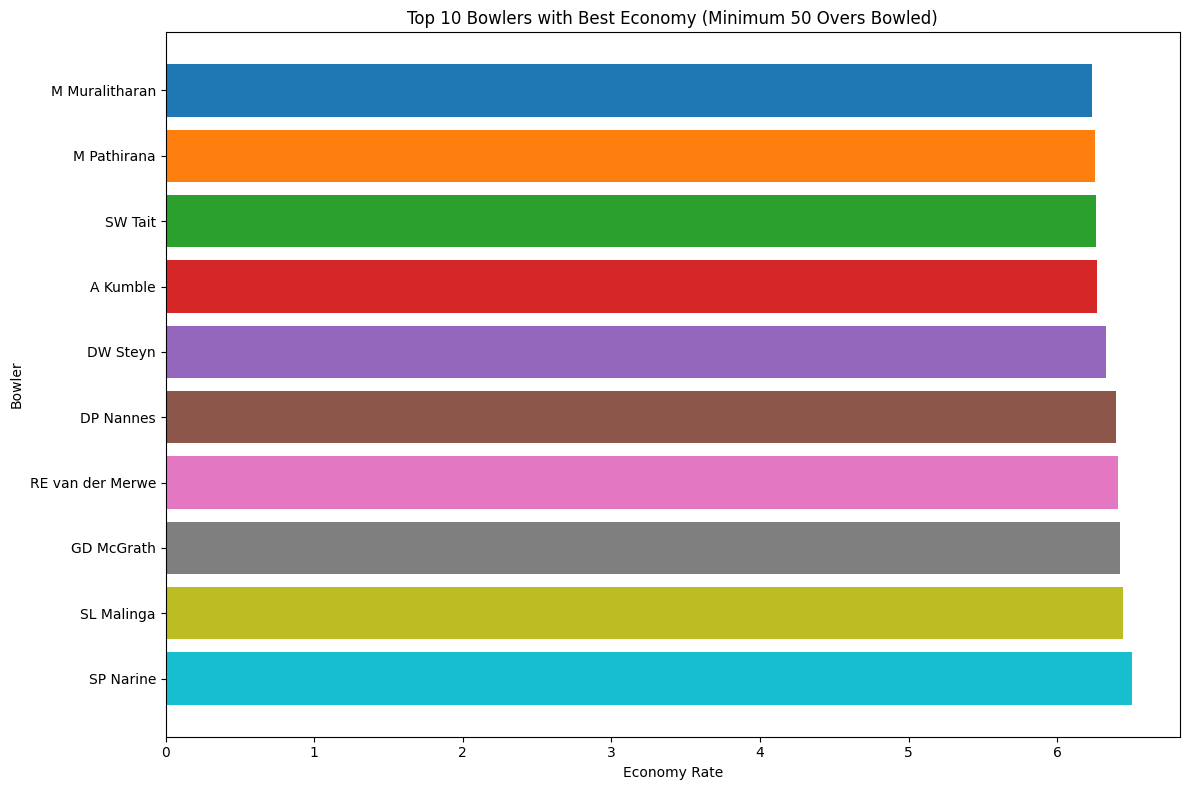

                   economy       overs
bowler                                
M Muralitharan    6.231499  263.500000
M Pathirana       6.250497   83.833333
SW Tait           6.258427   89.000000
A Kumble          6.268566  163.833333
DW Steyn          6.326030  380.333333
DP Nannes         6.391872  114.833333
RE van der Merwe  6.408791   75.833333
GD McGrath        6.419453   54.833333
SL Malinga        6.443847  495.666667
SP Narine         6.500724  691.000000


In [ ]:

# Compute aggregated statistics for each bowler
eco = data.groupby("bowler").agg({"batsman_runs": "sum", "ball": "count"}).sort_values(by="ball", ascending=False)
eco["overs"] = eco["ball"] / 6  # Convert balls to overs
eco["economy"] = eco["batsman_runs"] / eco["overs"]

# Filter bowlers with more than 50 overs and sort by economy
filtered_eco = eco[eco["overs"] > 50].sort_values(by="economy").head(10)

# Plotting
plt.figure(figsize=(12, 8))

# Assign distinct colors for the bars
colors = plt.cm.tab10(np.linspace(0, 1, len(filtered_eco)))

# Horizontal bar plot
plt.barh(filtered_eco.index, filtered_eco["economy"], color=colors)
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers with Best Economy (Minimum 50 Overs Bowled)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
# Display top 10 bowlers in a DataFrame
print(filtered_eco[["economy", "overs"]])


**Top 10 batsmen by strike rate**

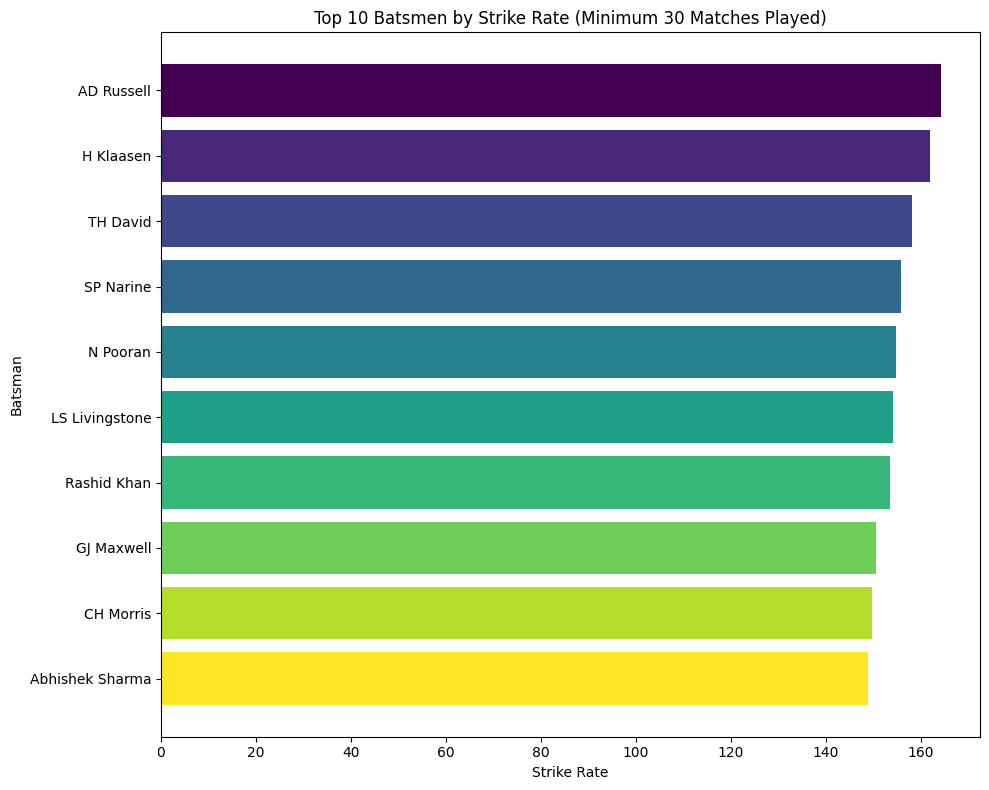

              batter  total_runs  balls_faced  strike_rate  matches_played
39        AD Russell        2488         1515   164.224422             104
208        H Klaasen         993          613   161.990212              32
612         TH David         659          417   158.033573              35
561        SP Narine        1534          984   155.894309             106
396         N Pooran        1769         1143   154.768154              72
323   LS Livingstone         939          609   154.187192              39
504      Rashid Khan         545          355   153.521127              58
203       GJ Maxwell        2772         1842   150.488599             128
125        CH Morris         618          413   149.636804              49
70   Abhishek Sharma        1377          925   148.864865              61


In [ ]:
# Filter required columns
batsman_data = data[['batter', 'ball', 'batsman_runs']]

# Calculate total runs and total balls faced per batsman
batsman_stats = (
    batsman_data.groupby('batter')
    .agg({'batsman_runs': 'sum', 'ball': 'count'})
    .rename(columns={'batsman_runs': 'total_runs', 'ball': 'balls_faced'})
    .reset_index()
)

# Add strike rate and filter batsmen with more than 30 matches
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100
batsman_stats['matches_played'] = data.groupby('batter')['match_id'].nunique().values
batsman_stats = batsman_stats[batsman_stats['matches_played'] > 30]

# Select top 10 batsmen by strike rate
top_10_batsmen = batsman_stats.sort_values('strike_rate', ascending=False).head(10)

# Define a colormap for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_batsmen)))

# Plot: Horizontal bar chart with distinct colors
plt.figure(figsize=(10, 8))
plt.barh(top_10_batsmen['batter'], top_10_batsmen['strike_rate'], color=colors)
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen by Strike Rate (Minimum 30 Matches Played)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print(top_10_batsmen)

**Top 10 Batsmen with Maximum Sixes Hit**

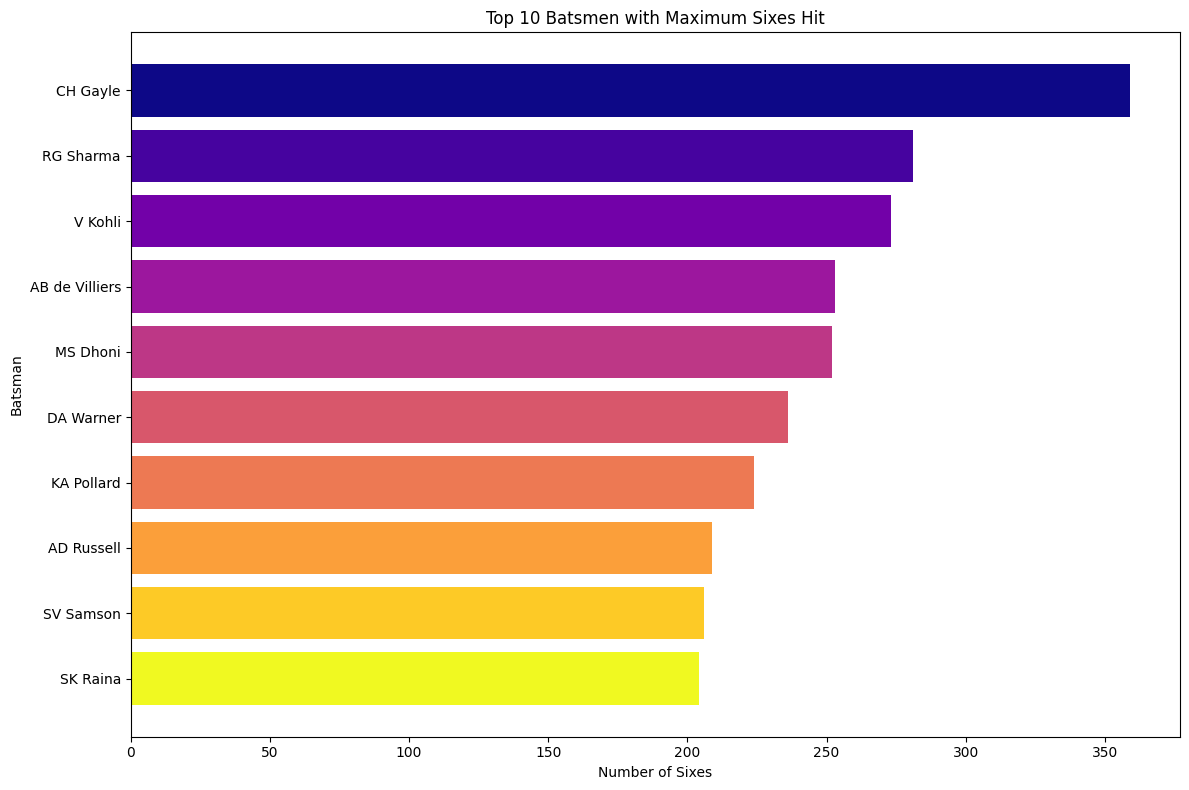

batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: batsman_runs, dtype: int64


In [ ]:
# Count the number of sixes hit by each batsman
batsman_sixes = data[data["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count()

# Sort the batsmen by the number of sixes hit (in descending order) and select top 10
top_10_batsmen_sixes = batsman_sixes.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))

# Horizontal bar plot with different colors
plt.barh(top_10_batsmen_sixes.index, top_10_batsmen_sixes.values, color=plt.cm.plasma(np.linspace(0, 1, len(top_10_batsmen_sixes))))

plt.xlabel('Number of Sixes')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen with Maximum Sixes Hit')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display the top 10 batsmen with their sixes count
print(top_10_batsmen_sixes)


**Top 10 teams with maximum wins**

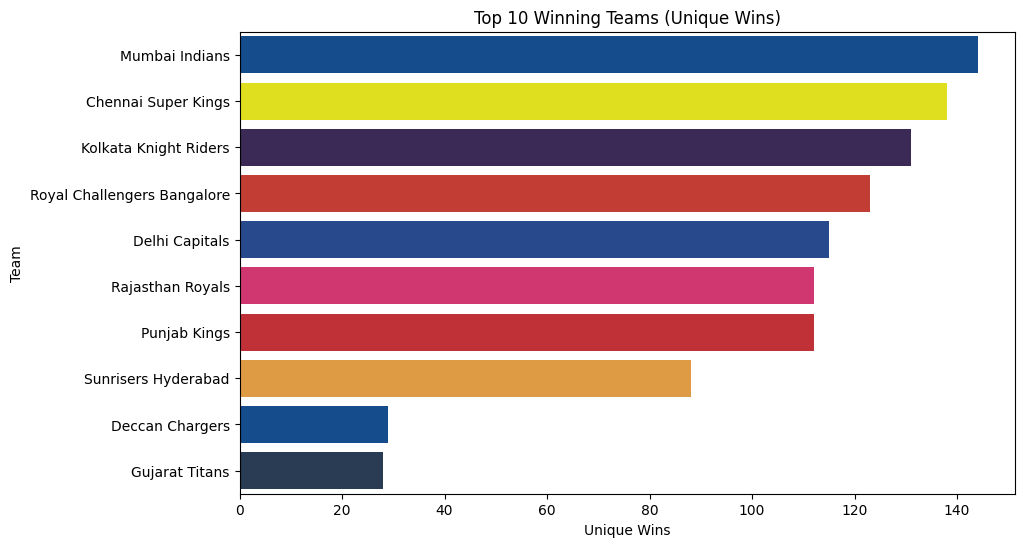

In [ ]:
# Define team colors
team_colors = {
    "Mumbai Indians": "#004BA0",  # Blue
    "Chennai Super Kings": "#FFFF00",  # Yellow
    "Royal Challengers Bangalore": "#DA291C",  # Red
    "Kolkata Knight Riders": "#3A225D",  # Purple
    "Sunrisers Hyderabad": "#F99F29",  # Orange
    "Delhi Capitals": "#17449B",  # Dark Blue
    "Rajasthan Royals": "#EA1C68",  # Pink
    "Punjab Kings": "#D71920",  # Red (updated name)
    "Gujarat Titans": "#23395B",  # Navy Blue
    "Lucknow Super Giants": "#2B8C59",  # Greenish Blue
    "Deccan Chargers": "#004BA0",  # Blue (similar to MI)
    "Rising Pune Supergiants": "#702D8A",  # Purple
    "Pune Warriors": "#00BFFF",  # Light Blue
    "Kochi Tuskers Kerala": "#FF4500",  # Orange
}

# Calculate unique wins for each team
unique_winning_teams = data.groupby('match_id')['winner'].first().value_counts()

# Select top 10 winning teams
unique_winning_teams = unique_winning_teams.head(10)

# Assign colors to teams in the unique winning teams data
bar_colors = [team_colors.get(team, '#000000') for team in unique_winning_teams.index] # Using .get() to handle missing colors

# Plot the bar graph with jersey colors
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_winning_teams.values, y=unique_winning_teams.index, palette=bar_colors)
plt.title('Top 10 Winning Teams (Unique Wins)')
plt.xlabel('Unique Wins')
plt.ylabel('Team')
plt.show()


**Orange Cap Winner Per Season**

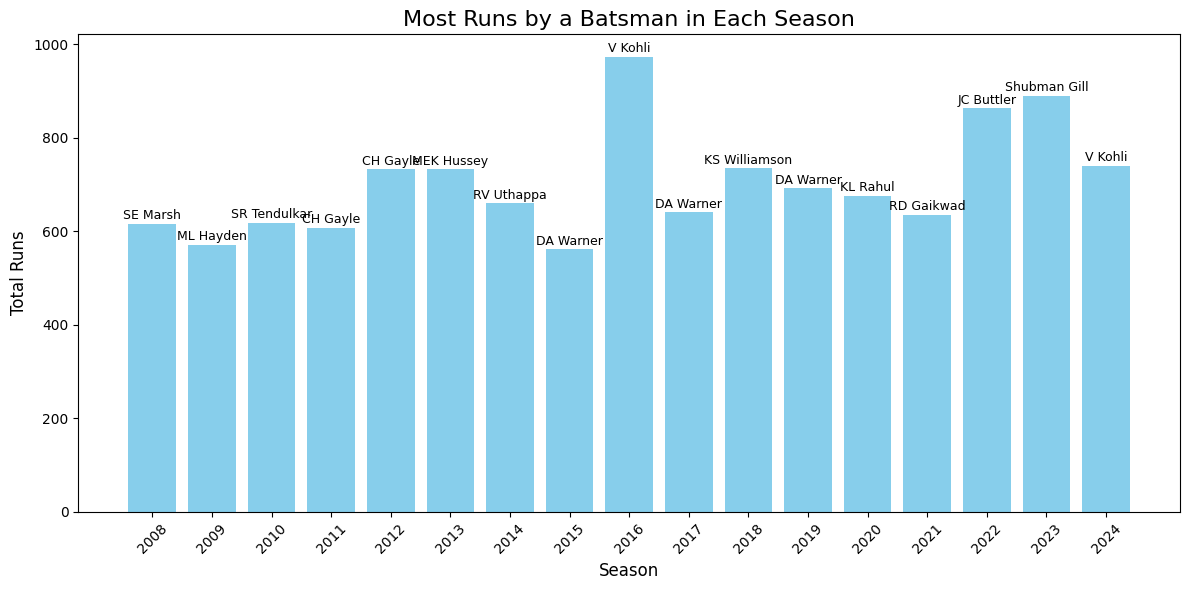

In [ ]:
# Group by season and batter, summing up the batsman runs
season_batter_runs = data.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

# Find the batsman with the most runs in each season
most_runs_per_season = season_batter_runs.loc[season_batter_runs.groupby('season')['batsman_runs'].idxmax()]

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(most_runs_per_season['season'], most_runs_per_season['batsman_runs'], color='skyblue')

# Annotate the batsman's name on top of the bars
for i in range(len(most_runs_per_season)):
    plt.text(
        most_runs_per_season['season'].iloc[i],
        most_runs_per_season['batsman_runs'].iloc[i] + 10,
        most_runs_per_season['batter'].iloc[i],
        ha='center', fontsize=9
    )

# Add labels and title
plt.title("Most Runs by a Batsman in Each Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Runs", fontsize=12)
plt.xticks(most_runs_per_season['season'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Purple Cap Winner Per Season**

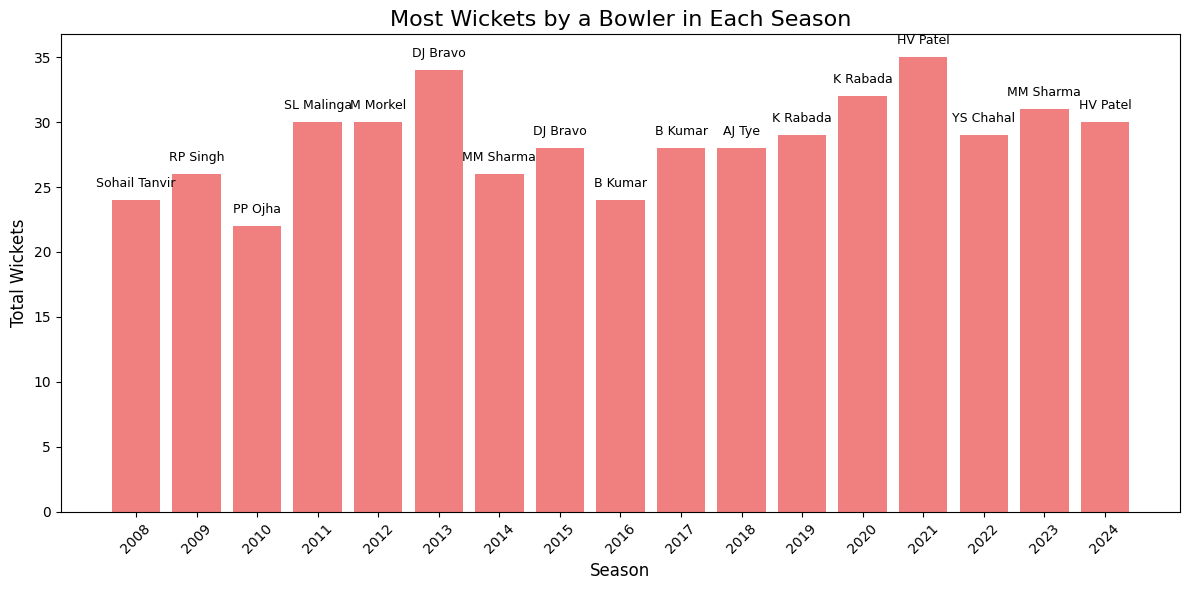

In [ ]:
# Group by season and bowler, summing up the wickets (where is_wicket == 1)
season_bowler_wickets = data.groupby(['season', 'bowler'])['is_wicket'].sum().reset_index()

# Find the bowler with the most wickets in each season
most_wickets_per_season = season_bowler_wickets.loc[season_bowler_wickets.groupby('season')['is_wicket'].idxmax()]

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(most_wickets_per_season['season'], most_wickets_per_season['is_wicket'], color='lightcoral')

# Annotate the bowler's name on top of the bars
for i in range(len(most_wickets_per_season)):
    plt.text(
        most_wickets_per_season['season'].iloc[i],
        most_wickets_per_season['is_wicket'].iloc[i] + 1,
        most_wickets_per_season['bowler'].iloc[i],
        ha='center', fontsize=9
    )

# Add labels and title
plt.title("Most Wickets by a Bowler in Each Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Wickets", fontsize=12)
plt.xticks(most_wickets_per_season['season'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



**Successful Teams Of IPL**

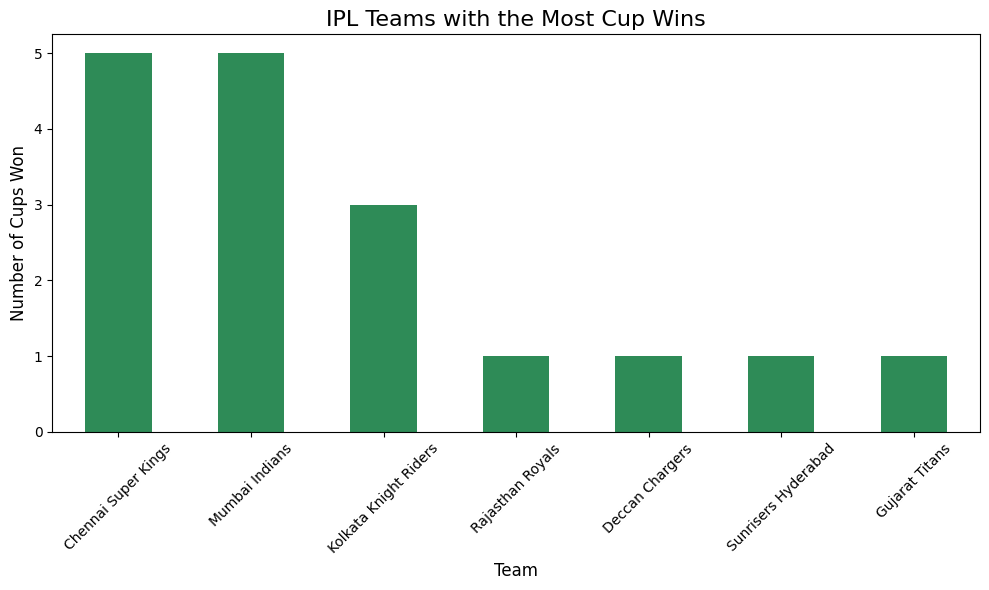

In [ ]:
# Filter final matches based on match_type (assumes 'final' identifies championship matches)
final_matches = data[data['match_type'].str.lower() == 'final']

# Drop duplicates to keep only one row per final match
final_matches = final_matches.drop_duplicates(subset=['match_id'])

# Count the number of times each team won the cup (from the 'winner' column)
team_cup_wins = final_matches['winner'].value_counts()

# Visualization
plt.figure(figsize=(10, 6))
team_cup_wins.sort_values(ascending=False).plot(kind='bar', color='seagreen')

# Add labels and title
plt.title("IPL Teams with the Most Cup Wins", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of Cups Won", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
